In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Default value
pd.set_option("display.width", 80)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

=====================================================================================

In [4]:
el_la = pd.read_csv("El-Nino.csv", sep=';', encoding="Windows-1250")
#el_la

In [5]:
el_la_to_drop = [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960]

for i in range(len(el_la_to_drop)):
    el_la.drop(el_la[el_la['year'] == el_la_to_drop[i]].index, inplace=True)

In [6]:
el_la.reset_index(drop=True,inplace=True)
#el_la

In [7]:
# El Niño
# 0.5 START
# 0.5 Weak
# 1.0 Moderate
# 1.5 Strong
# 2.0 Very Strong 
# La Niña
# -0.5 START
# -0.5 Weak
# -1.0 Moderate
# -1.5 Strong
# -2.0 Very Strong

In [8]:
el_la['mean'] = ''

In [9]:
for i in range(el_la.shape[0]):
    el_la.iloc[i,-1] = round(np.mean(el_la.loc[i][-13:-1]),1)

In [10]:
el_la.drop(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], axis=1, inplace=True)

In [11]:
#el_la #.reset_index()

In [12]:
el_la['area'] = 'El Nino - La Nina'

In [13]:
el_la_p = el_la.pivot(index='area', columns='year', values='mean')

el_la_p = el_la_p.reset_index()

In [14]:
el_la_p

year,area,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,El Nino - La Nina,-0.20,-0.00,0.60,-0.30,1.30,-0.20,-0.30,0.70,0.40,...,-1.20,-0.60,-0.10,-0.20,0.60,1.70,-0.20,-0.50,0.60,0.30


=====================================================================================

In [15]:
# Default DataFrame (ZMIENIONA ŚCIEŻKA POD MÓJ DYSK W GOOGLE CLOUD)
temp = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding="Windows-1250") #index_col=False
#df.head(1)

In [16]:
# Replacing comas in string
temp['Area'] = temp['Area'].str.replace(',','')
# Replacing quote in string
temp['Area'] = temp['Area'].str.replace('\"','')

In [17]:
temp.columns   

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')

In [18]:
temp['Months'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

In [19]:
temp['Months'] = temp['Months'].replace("Dec–Jan–Feb", "Winter")
temp['Months'] = temp['Months'].replace("Mar–Apr–May", "Spring")
temp['Months'] = temp['Months'].replace("Jun–Jul–Aug", "Summer")
temp['Months'] = temp['Months'].replace("Sep–Oct–Nov", "Autumn")
temp.columns = temp.columns.str.replace('Y', '')
temp.drop('Unit', axis=1, inplace=True)
temp = temp.rename(columns={"Area Code": "area_code",
                            "Area": "area",
                            "Months Code": "months_code",
                            "Months": "months",
                            "Element Code": "element_code",
                            "Element": "element"})

In [20]:
temp.head(1)

,area_code,area,months_code,months,element_code,element,1961,1962,1963,1964,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,7001,January,7271,Temperature change,0.78,0.06,2.74,-5.23,...,3.60,1.18,-0.58,1.23,1.75,1.94,3.42,1.20,2.00,2.95


In [21]:
# Select the row that contains USSR in the area column
ussr_row = temp.loc[temp['area'] == 'USSR']
#ussr_row.loc[:,'1961':'2019'].isna()

In [22]:
# for loop array
ussr_area = ['Armenia', 'Azerbaijan', 'Belarus', 'Estonia',
             'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Latvia',
             'Lithuania', 'Republic of Moldova', 'Russian Federation',
             'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

# Check NAN, from-to which year to update from ussr_row variable
# for i in range(len(ussr_area)):
#     print(temp.loc[temp['area'] == ussr_area[i]].loc[:,'1961':'2019'].isna())


# Non loop verision
# armenia_row = temp.loc[temp['area'] == 'Armenia']
# armenia_row.loc[:,'1961':'2019'].isna()

In [23]:
# Copy the non-NAN values from USSR row to appropriate NAN value
# in years columns in appropriate country-area row (from ussr_area array)
for i in range(len(ussr_area)):
    temp.loc[temp['area'] == ussr_area[i], '1961':'1991'] = ussr_row.loc[:,'1961':'1991'].values

# Non loop verision
# temp.loc[temp['area'] == 'Armenia', '1961':'1991'] = ussr_row.loc[:,'1961':'1991'].values

In [24]:
# Select the row that contains Belgium-Luxembourg in the area column
belgium_lux_row = temp.loc[temp['area'] == 'Belgium-Luxembourg']
#belgium_lux_row.loc[:,'1961':'2019'].isna()

In [25]:
# for loop array
bel_lux_area = ['Belgium', 'Luxembourg']

# Check NAN, from-to which year to update from bel_lux_area variable
# for i in range(len(bel_lux_area)):
#     print(temp.loc[temp['area'] == bel_lux_area[i]].loc[:,'1961':'2019'].isna())

In [26]:
# Copy the non-NAN values from Belgium-Luxembourg row to appropriate NAN value
# in years columns in appropriate country-area row (from bel_lux_area array)
for i in range(len(bel_lux_area)):
    temp.loc[temp['area'] == bel_lux_area[i], '1961':'1999'] = belgium_lux_row.loc[:,'1961':'1999'].values

In [27]:
# Select the row that contains Czechoslovakia in the area column
czechoslovakia_row = temp.loc[temp['area'] == 'Czechoslovakia']
# czechoslovakia_row.loc[:,'1961':'2019'].isna()

In [28]:
# for loop array
czechoslovakia_area = ['Czechia', 'Slovakia']

# Check NAN, from-to which year to update from czechoslovakia_area variable
# for i in range(len(czechoslovakia_area)):
#     print(temp.loc[temp['area'] == czechoslovakia_area[i]].loc[:,'1961':'2019'].isna())

In [29]:
# Copy the non-NAN values from Czechoslovakia row to appropriate NAN value
# in years columns in appropriate country-area row (from czechoslovakia_area array)
for i in range(len(czechoslovakia_area)):
    temp.loc[temp['area'] == czechoslovakia_area[i], '1961':'1992'] = czechoslovakia_row.loc[:,'1961':'1992'].values

In [30]:
# Select the row that contains Yugoslav SFR in the area column
yugoslav_row = temp.loc[temp['area'] == 'Yugoslav SFR']
# yugoslav_row.loc[:,'1961':'2019'].isna()

In [31]:
# for loop array
yugoslav_area = ['Croatia', 'Slovenia', 'Bosnia and Herzegovina',
                 'North Macedonia', 'Serbia and Montenegro']

# Check NAN, from-to which year to update from yugoslav_area variable
# for i in range(len(yugoslav_area)):
#     print(temp.loc[temp['area'] == yugoslav_area[i]].loc[:,'1961':'2019'].isna())

In [32]:
# Copy the non-NAN values from Yugoslav SFR row to appropriate NAN value
# in years columns in appropriate country-area row (from yugoslav_area array)
for i in range(len(yugoslav_area)):
    temp.loc[temp['area'] == yugoslav_area[i], '1961':'1991'] = yugoslav_row.loc[:,'1961':'1991'].values

In [33]:
# Select the row that contains Serbia and Montenegro in the area column
s_m_row = temp.loc[temp['area'] == 'Serbia and Montenegro']
# s_m_row.loc[:,'1961':'2019'].isna()

In [34]:
# for loop array
s_m_area = ['Montenegro', 'Serbia']

# Check NAN, from-to which year to update from s_m_area variable
# for i in range(len(s_m_area)):
#     print(temp.loc[temp['area'] == s_m_area[i]].loc[:,'1961':'2019'].isna())

In [35]:
# Copy the non-NAN values from Serbia and Montenegro row to appropriate NAN value
# in years columns in appropriate country-area row (from s_m_area array)
for i in range(len(s_m_area)):
    temp.loc[temp['area'] == s_m_area[i], '1961':'2005'] = s_m_row.loc[:,'1961':'2005'].values

In [36]:
# Select the row that contains Sudan (former) in the area column
sudan_f_row = temp.loc[temp['area'] == 'Sudan (former)']
# sudan_f_row.loc[:,'1961':'2019'].isna()

In [37]:
# for loop array
sudan_f_area = ['Sudan', 'South Sudan']

# Check NAN, from-to which year to update from sudan_f_area variable
# for i in range(len(sudan_f_area)):
#     print(temp.loc[temp['area'] == sudan_f_area[i]].loc[:,'1961':'2019'].isna())

In [38]:
# Copy the non-NAN values from Sudan (former) row to appropriate NAN value
# in years columns in appropriate country-area row (from sudan_f_area array)
for i in range(len(sudan_f_area)):
    temp.loc[temp['area'] == sudan_f_area[i], '1961':'2010'] = sudan_f_row.loc[:,'1961':'2010'].values

In [39]:
# Select the row that contains Ethiopia PDR in the area column
ethiopia_pdr_row = temp.loc[temp['area'] == 'Ethiopia PDR']
# ethiopia_pdr_row.loc[:,'1961':'2019'].isna()

In [40]:
# Check NAN, from-to which year to update
#temp.loc[temp['area'] == 'Ethiopia'].loc[:,'1961':'2019'].isna()

In [41]:
# Copy the non-NAN values from Ethiopia PDR row to appropriate NAN value in years columns in Ethiopia row
temp.loc[temp['area'] == 'Ethiopia', '1961':'1992'] = ethiopia_pdr_row.loc[:,'1961':'1992'].values

In [42]:
temp_c_to_drop = ['USSR', 'Belgium-Luxembourg', 'Czechoslovakia', 'Yugoslav SFR', 'Serbia and Montenegro', 'Sudan (former)', 'Ethiopia PDR']

for i in range(len(temp_c_to_drop)):
    temp.drop(temp[temp['area'] == temp_c_to_drop[i]].index, inplace=True)

In [43]:
# temp.iloc[:,-59:].isna().sum()

In [44]:
for i in range(temp.shape[0]):
    temp.iloc[i,-59:] = temp.iloc[i,-59:].bfill(axis ='rows')
    temp.iloc[i,-59:] = temp.iloc[i,-59:].ffill(axis ='rows')

In [45]:
temp.iloc[:,-59:].isna().sum()

1961    170
1962    170
1963    170
1964    170
1965    170
1966    170
1967    170
1968    170
1969    170
1970    170
1971    170
1972    170
1973    170
1974    170
1975    170
1976    170
1977    170
1978    170
1979    170
1980    170
1981    170
1982    170
1983    170
1984    170
1985    170
1986    170
1987    170
1988    170
1989    170
1990    170
1991    170
1992    170
1993    170
1994    170
1995    170
1996    170
1997    170
1998    170
1999    170
2000    170
2001    170
2002    170
2003    170
2004    170
2005    170
2006    170
2007    170
2008    170
2009    170
2010    170
2011    170
2012    170
2013    170
2014    170
2015    170
2016    170
2017    170
2018    170
2019    170
dtype: int64

In [46]:
# del in temp, co2, forest, gdp, urban pop
t_drop_rows = ['Anguilla', 'Belgium-Luxembourg', 'China mainland', 'China Taiwan Province of',
               'Christmas Island', 'Cocos (Keeling) Islands', 'Cook Islands', 'Czechoslovakia',
               'Ethiopia PDR', 'Falkland Islands (Malvinas)', 'French Guiana', 
               'French Southern and Antarctic Territories', 'Guadeloupe', 'Holy See', 'Martinique',
               'Mayotte', 'Midway Island', 'Montserrat', 'Netherlands Antilles (former)', 'Niue',
               'Norfolk Island', 'Pitcairn Islands', 'Réunion', 'Saint Helena Ascension and Tristan da Cunha',
               'Saint Pierre and Miquelon', 'Serbia and Montenegro', 'South Georgia and the South Sandwich Islands',
               'Sudan (former)', 'Svalbard and Jan Mayen Islands', 'Tokelau', 'USSR', 'Wake Island',
               'Wallis and Futuna Islands', 'Yugoslav SFR']

for i in range(len(t_drop_rows)):
    temp.drop(temp[temp['area'] == t_drop_rows[i]].index, inplace=True)

In [47]:
t_rename = {'Bolivia (Plurinational State of)': 'Bolivia', 
'Bosnia and Herzegovina': 'Bosnia and Herz.', 
'Brunei Darussalam': 'Brunei', 
'Caribbean': 'Caribbean small states', 
'Central African Republic': 'Central African Rep.', 
'Congo': 'Congo', 
'Côte d\'Ivoire': 'Côte d\'Ivoire', 
'Democratic Republic of the Congo': 'Dem. Rep. Congo', 
'Dominican Republic': 'Dominican Rep.', 
'Equatorial Guinea': 'Eq. Guinea', 
'Eswatini': 'eSwatini', 
'Falkland Islands (Malvinas)': 'Falkland Is.', 
'French Southern and Antarctic Territories': 'Fr. S. Antarctic Lands', 
'Iran (Islamic Republic of)': 'Iran', 
'Lao People\'s Democratic Republic': 'Laos', 
'Micronesia (Federated States of)': 'Micronesia Fed. Sts.', 
'Republic of Moldova': 'Moldova', 
'Democratic People\'s Republic of Korea': 'North Korea', 
'Pacific Islands Trust Territory': 'Pacific island small states', 
'Réunion': 'Reunion', 
'Russian Federation': 'Russia', 
'South Sudan': 'S. Sudan', 
'Slovakia': 'Slovakia', 
'Solomon Islands': 'Solomon Is.', 
'Republic of Korea': 'South Korea', 
'Saint Kitts and Nevis': 'St. Kitts and Nevis', 
'Saint Lucia': 'St. Lucia', 
'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines', 
'Syrian Arab Republic': 'Syria', 
'China Taiwan Province of': 'Taiwan', 
'United Republic of Tanzania': 'Tanzania', 
'Venezuela (Bolivarian Republic of)': 'Venezuela', 
'Viet Nam': 'Vietnam', 
'United States Virgin Islands': 'Virgin Islands (U.S.)'}

temp['area'] = temp['area'].replace(t_rename)

=====================================================================================

In [48]:
co20 = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/co2.csv", encoding="Windows-1250")
co20.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [49]:
co20['country_name'] = co20['country_name'].str.replace(',','')
co20 = co20.loc[(co20['year'] >= 1961)]
co20 = co20.sort_values(by=['country_name','year'])

co20.head(1)

,country_code,country_name,year,value
118,AFG,Afghanistan,1961,491.38


In [50]:
all_countries1 = co20['country_name'].unique()

for i in range(len(all_countries1)):
    co2 = co20.pivot(index='country_name', columns='year', values='value')

co2 = co2.reset_index()

for i in range(co2.shape[0]):
    co2.iloc[i,-59:] = co2.iloc[i,-59:].bfill(axis ='rows')
    co2.iloc[i,-59:] = co2.iloc[i,-59:].ffill(axis ='rows')

#co2.columns
#co2.iloc[:,0]

#co2

In [51]:
c_drop_rows = ['Bermuda', 'Curacao', 'Kosovo','Sint Maarten (Dutch part)']
# (MISS c_drop_rows: Channel Islands, Guam, Isle of Man, Monaco, Puerto Rico, San Marino, United States Virgin Islands)
# (rename inside co2: Turkey -> Turkiye ->(zmiana nazwy 1989 i 1990)) -> zrobić by było wszędzie Turkey
co2['country_name'] = co2['country_name'].str.replace('Turkiye','Turkey')

for i in range(len(c_drop_rows)):
    co2.drop(co2[co2['country_name'] == c_drop_rows[i]].index, inplace=True)

In [52]:
c_rename = {'Bahamas The': 'Bahamas', 
'Bosnia and Herzegovina': 'Bosnia and Herz.', 
'Brunei Darussalam': 'Brunei', 
'Caribbean small states': 'Caribbean small states', 
'Central African Republic': 'Central African Rep.', 
'Congo Rep.': 'Congo', 
'Cote d\'Ivoire': 'Côte d\'Ivoire', 
'Congo Dem. Rep.': 'Dem. Rep. Congo', 
'Dominican Republic': 'Dominican Rep.', 
'Egypt Arab Rep.': 'Egypt', 
'Equatorial Guinea': 'Eq. Guinea', 
'Eswatini': 'eSwatini', 
'Gambia The': 'Gambia', 
'Iran Islamic Rep.': 'Iran', 
'Kyrgyz Republic': 'Kyrgyzstan', 
'Lao PDR': 'Laos', 
'Korea Dem. People\'s Rep.': 'North Korea', 
'West Bank and Gaza': 'Palestine', 
'Russian Federation': 'Russia', 
'South Sudan': 'S. Sudan', 
'Slovak Republic': 'Slovakia', 
'Solomon Islands': 'Solomon Is.', 
'Korea Rep.': 'South Korea', 
'Syrian Arab Republic': 'Syria', 
'United States': 'United States of America', 
'Venezuela RB': 'Venezuela', 
'Yemen Rep.': 'Yemen'}

co2['country_name'] = co2['country_name'].replace(c_rename)

In [53]:
co2.head(1)

year,country_name,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,491.38,689.40,707.73,839.74,1008.42,1092.77,1283.45,1224.78,942.42,...,7110.00,8930.00,8080.00,5990.00,4880.00,5950.00,5300.00,4780.00,6070.00,6080.00


=====================================================================================

In [54]:
# (1990 - 2020)
forest0 = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/forest.csv", encoding="Windows-1250")
forest0.columns

Index(['country_code', 'country_name', 'year', 'value'], dtype='object')

In [55]:
forest0['country_name'] = forest0['country_name'].str.replace(',','')
forest0 = forest0.loc[(forest0['year'] <= 2019)]
forest0 = forest0.sort_values(by=['country_name','year'])
forest0.head(1)

,country_code,country_name,year,value
62,AFG,Afghanistan,1990,1.85


In [56]:
all_countries2 = forest0['country_name'].unique()

for i in range(len(all_countries2)):
    forest = forest0.pivot(index='country_name', columns='year', values='value')

for i in range(forest.shape[0]):
    forest.iloc[i,-59:] = forest.iloc[i,-59:].bfill(axis ='rows')
    forest.iloc[i,-59:] = forest.iloc[i,-59:].ffill(axis ='rows')

forest = forest.reset_index()

#forest

In [57]:

f_drop_rows = ['Bermuda', 'Kosovo','Sint Maarten (Dutch part)']
# (MISS f_drop_rows: China Hong Kong SAR, Macao SAR China)
# (rename inside forest: Czech Republic -> Czechia ->(zmiana nazwy 1992 i 1993)) -> zrobić by było wszędzie Czechia (geopandas) XOR Czech Republic (jeśli inne)
forest['country_name'] = forest['country_name'].str.replace('Czech Republic','Czechia')

for i in range(len(f_drop_rows)):
    forest.drop(forest[forest['country_name'] == f_drop_rows[i]].index, inplace=True)

In [58]:
f_rename = {'Bahamas The': 'Bahamas', 
'Bosnia and Herzegovina': 'Bosnia and Herz.', 
'Brunei Darussalam': 'Brunei', 
'Central African Republic': 'Central African Rep.', 
'Congo Rep.': 'Congo', 
'Cote d\'Ivoire': 'Côte d\'Ivoire', 
'Congo Dem. Rep.': 'Dem. Rep. Congo', 
'Dominican Republic': 'Dominican Rep.', 
'Egypt Arab Rep.': 'Egypt', 
'Equatorial Guinea': 'Eq. Guinea', 
'Eswatini': 'eSwatini', 
'Gambia The': 'Gambia', 
'Iran Islamic Rep.': 'Iran', 
'Kyrgyz Republic': 'Kyrgyzstan', 
'Lao PDR': 'Laos', 
'Korea Dem. People\'s Rep.': 'North Korea', 
'West Bank and Gaza': 'Palestine', 
'Russian Federation': 'Russia', 
'South Sudan': 'S. Sudan', 
'Slovak Republic': 'Slovakia', 
'Solomon Islands': 'Solomon Is.', 
'Korea Rep.': 'South Korea', 
'Syrian Arab Republic': 'Syria', 
'United States': 'United States of America', 
'Venezuela, RB': 'Venezuela', 
'Yemen, Rep.': 'Yemen'}

forest['country_name'] = forest['country_name'].replace(f_rename)

In [59]:
forest.head(1)

year,country_name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1.85,1.85,1.85,1.85,1.85,1.85,1.85,1.85,1.85,...,1.85,1.85,1.85,1.85,1.85,1.85,1.85,1.85,1.85,1.85


=====================================================================================

In [60]:
# (1960 - 2020)
pkb0 = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/GDP_percapita.csv", encoding="Windows-1250")
pkb0.columns

Index(['Country Name', 'Code', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', 'Unnamed: 65'],
      dtype='object')

In [61]:
pkb0.drop(['1960','2020','Unnamed: 65'], axis=1, inplace=True)
pkb0['Country Name'] = pkb0['Country Name'].str.replace(',','')
pkb0['Country Name'] = pkb0['Country Name'].str.replace('\"','')

pkb = pkb0.sort_values(by=['Country Name'])

In [62]:
for i in range(pkb.shape[0]):
    pkb.iloc[i,-59:] = pkb.iloc[i,-59:].bfill(axis ='rows')
    pkb.iloc[i,-59:] = pkb.iloc[i,-59:].ffill(axis ='rows')

pkb = pkb.reset_index()
pkb.drop('index', axis=1, inplace=True)

# pkb

In [63]:
pkb_drop_rows = ['Sint Maarten (Dutch part)'] 

for i in range(len(pkb_drop_rows)):
    pkb.drop(pkb[pkb['Country Name'] == pkb_drop_rows[i]].index, inplace=True)

In [64]:
pkb_rename = {'Bahamas The': 'Bahamas', 
'Bosnia and Herzegovina': 'Bosnia and Herz.', 
'Brunei Darussalam': 'Brunei', 
'Central African Republic': 'Central African Rep.', 
'Congo Rep.': 'Congo', 
'Cote d\'Ivoire': 'Côte d\'Ivoire', 
'Czech Republic': 'Czechia', 
'Congo Dem. Rep.': 'Dem. Rep. Congo', 
'Dominican Republic': 'Dominican Rep.', 
'Egypt Arab Rep.': 'Egypt', 
'Equatorial Guinea': 'Eq. Guinea', 
'Eswatini': 'eSwatini', 
'Gambia The': 'Gambia', 
'Iran Islamic Rep.': 'Iran', 
'Kyrgyz Republic': 'Kyrgyzstan', 
'Lao PDR': 'Laos', 
'Korea Dem. People\'s Rep.': 'North Korea', 
'West Bank and Gaza': 'Palestine', 
'Russian Federation': 'Russia', 
'South Sudan': 'S. Sudan', 
'Slovak Republic': 'Slovakia', 
'Solomon Islands': 'Solomon Is.', 
'Korea Rep.': 'South Korea', 
'Syrian Arab Republic': 'Syria', 
'United States': 'United States of America', 
'Venezuela RB': 'Venezuela', 
'Yemen Rep.': 'Yemen'}

pkb['Country Name'] = pkb['Country Name'].replace(pkb_rename)

In [65]:
pkb.head(1)

,Country Name,Code,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,59.86,58.46,78.71,82.10,101.11,137.59,160.90,129.11,...,543.31,591.19,638.85,624.32,614.22,556.01,512.01,516.68,485.67,494.18


=====================================================================================

In [66]:
# (1960 - 2020)
popul = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/share-of-population-urban.csv", encoding="Windows-1250")
popul.columns

Index(['Entity', 'Code', 'Year', 'Urban population (% of total population)'], dtype='object')

In [67]:
popul = popul.rename(columns={"Entity": "area",
                              "Year": "year",
                              popul.columns[3]: "urban_population_proc"})
popul.drop('Code', axis=1, inplace=True)
popul['area'] = popul['area'].str.replace(',','')
popul = popul.loc[(popul['year'] <= 2019) & (popul['year'] >= 1961)]
popul = popul.sort_values(by=['area','year'])
popul.head(1)

,area,year,urban_population_proc
1,Afghanistan,1961,8.68


In [68]:
all_countries3 = popul['area'].unique()

for i in range(len(all_countries3)):
    u_population = popul.pivot(index='area', columns='year', values='urban_population_proc')

for i in range(u_population.shape[0]):
    u_population.iloc[i,-59:] = u_population.iloc[i,-59:].bfill(axis ='rows')
    u_population.iloc[i,-59:] = u_population.iloc[i,-59:].ffill(axis ='rows')

u_population = u_population.reset_index()

# u_population

In [69]:
p_drop_rows = ['Sint Maarten (Dutch part)']
# (MISS p_drop_rows: Caribbean)

for i in range(len(p_drop_rows)):
    u_population.drop(u_population[u_population['area'] == p_drop_rows[i]].index, inplace=True)

In [70]:
p_rename = {'Bosnia and Herzegovina': 'Bosnia and Herz.', 
'Central African Republic': 'Central African Rep.', 
'Cote d\'Ivoire': 'Côte d\'Ivoire', 
'Democratic Republic of Congo': 'Dem. Rep. Congo', 
'Dominican Republic': 'Dominican Rep.', 
'Equatorial Guinea': 'Eq. Guinea', 
'Eswatini': 'eSwatini', 
'Hong Kong': 'Hong Kong SAR China', 
'Macao': 'Macao SAR China', 
'South Sudan': 'S. Sudan', 
'Solomon Islands': 'Solomon Is.', 
'Saint Kitts and Nevis': 'St. Kitts and Nevis', 
'Saint Lucia': 'St. Lucia', 
'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines', 
'Timor': 'Timor-Leste', 
'United States': 'United States of America', 
'United States Virgin Islands': 'Virgin Islands (U.S.)'}

u_population['area'] = u_population['area'].replace(p_rename)

In [71]:
u_population.head(1)

year,area,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,8.68,8.98,9.28,9.59,9.90,10.23,10.57,10.92,11.27,...,23.74,23.95,24.16,24.37,24.59,24.80,25.02,25.25,25.50,25.75


=====================================================================================

In [72]:
# El Nino / La Nina (1961-2019)
el_la_plot = el_la_p.iloc[:,-59:]
# =====================================================================================================
# Whole World temperatures (1961-2019)
world_t = temp.loc[(temp['area_code'] == 5000) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
# world_t.iloc[:,-59:].isna().sum()
world_t_ok = world_t.iloc[:,-59:]
# Whole World CO2 (1961-2019)
world_co2 = co2.loc[(co2['country_name'] == 'World')]
world_co2_ok = world_co2.iloc[:,-59:]
# Whole World Forest (1961-2019)
world_forest = forest.loc[(forest['country_name'] == 'World')]
world_forest_ok = world_forest.iloc[:,-59:]
# Whole World GDP (1961-2019)
world_pkb = pkb.loc[(pkb['Country Name'] == 'World')]
world_pkb_ok = world_pkb.iloc[:,-59:]
# Whole World Urban Population (1961-2019)
world_popul = u_population.loc[(u_population['area'] == 'World')]
world_popul_ok = world_popul.iloc[:,-59:]
# =====================================================================================================
# Africa temperatures (1961-2019)
africa_t = temp.loc[(temp['area_code'] == 5100) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
# africa_t.iloc[:,-59:].isna().sum()
africa_t_ok = africa_t.iloc[:,-59:]
# Africa CO2 (1961-2019)
africa_co2 = co2.loc[(co2['country_name'] == 'Africa Eastern and Southern') | (co2['country_name'] == 'Africa Western and Central') | (co2['country_name'] == 'Middle East & North Africa')]
africa_co2_ok = africa_co2.iloc[:,-59:].mean()
# Africa GDP (1961-2019)
africa_pkb = pkb.loc[(pkb['Country Name'] == 'Africa Eastern and Southern') | (pkb['Country Name'] == 'Africa Western and Central') | (pkb['Country Name'] == 'Middle East & North Africa')]
africa_pkb_ok = africa_pkb.iloc[:,-59:].mean()
# Africa Urban Population (1961-2019)
africa_popul = u_population.loc[(u_population['area'] == 'Middle East and North Africa') | (u_population['area'] == 'Sub-Saharan Africa')]
africa_popul_ok = africa_popul.iloc[:,-59:].mean()
# =====================================================================================================
# Caribbean, Northern & Central Americas temperatures (1961-2019)
north_america_t = temp.loc[((temp['area_code'] == 5203) | (temp['area_code'] == 5204) | (temp['area_code'] == 5206))
                            & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
# north_america_t.iloc[:,-59:].isna().sum()
north_america_t_ok = north_america_t.iloc[:,-59:].mean()
# Northern & Central Americas CO2 (1961-2019)
north_america_co2 = co2.loc[(co2['country_name'] == 'North America')]
north_america_co2_ok = north_america_co2.iloc[:,-59:]
# Northern & Central Americas Forest (1961-2019)
north_america_forest = forest.loc[(forest['country_name'] == 'North America')]
north_america_forest_ok = north_america_forest.iloc[:,-59:]
# Northern & Central Americas GDP (1961-2019)
north_america_pkb = pkb.loc[(pkb['Country Name'] == 'North America')]
north_america_pkb_ok = north_america_pkb.iloc[:,-59:]
# Northern & Central Americas Urban Population (1961-2019)
north_america_popul = u_population.loc[(u_population['area'] == 'North America')]
north_america_popul_ok = north_america_popul.iloc[:,-59:]
# =====================================================================================================
# South America temperatures (1961-2019)
south_america_t = temp.loc[(temp['area_code'] == 5207) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
#south_america_t.iloc[:,-59:].isna().sum()
south_america_t_ok = south_america_t.iloc[:,-59:]
# Caribbean & South America CO2 (1961-2019)
south_america_co2 = co2.loc[(co2['country_name'] == 'Latin America & Caribbean')]
south_america_co2_ok = south_america_co2.iloc[:,-59:]
# Caribbean & South America Forest (1961-2019)
south_america_forest = forest.loc[(forest['country_name'] == 'Latin America & Caribbean')]
south_america_forest_ok = south_america_forest.iloc[:,-59:]
# Caribbean & South America GDP (1961-2019)
south_america_pkb = pkb.loc[(pkb['Country Name'] == 'Latin America & Caribbean')]
south_america_pkb_ok = south_america_pkb.iloc[:,-59:]
# Caribbean & South America Urban Population (1961-2019)
south_america_popul = u_population.loc[(u_population['area'] == 'Latin America and Caribbean')]
south_america_popul_ok = south_america_popul.iloc[:,-59:]
# =====================================================================================================
# Asia temperatures (1961-2019)
asia_t = temp.loc[(temp['area_code'] == 5300) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
#asia_t.iloc[:,-59:].isna().sum()
asia_t_ok = asia_t.iloc[:,-59:]
# Asia CO2 (1961-2019)
asia_co2 = co2.loc[(co2['country_name'] == 'East Asia & Pacific') | (co2['country_name'] == 'Europe & Central Asia') | (co2['country_name'] == 'South Asia')]
asia_co2_ok = asia_co2.iloc[:,-59:].mean()
# Asia GDP (1961-2019)
asia_pkb = pkb.loc[(pkb['Country Name'] == 'East Asia & Pacific') | (pkb['Country Name'] == 'Europe & Central Asia') | (pkb['Country Name'] == 'South Asia')]
asia_pkb_ok = asia_pkb.iloc[:,-59:].mean()
# Asia Urban Population (1961-2019)
asia_popul = u_population.loc[(u_population['area'] == 'East Asia & Pacific') | (u_population['area'] == 'Europe & Central Asia') | (u_population['area'] == 'South Asia')]
asia_popul_ok = asia_popul.iloc[:,-59:].mean()
# =====================================================================================================
# Europe temperatures (1961-2019)
europe_t = temp.loc[(temp['area_code'] == 5400) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
#europe_t.iloc[:,-59:].isna().sum()
europe_t_ok = europe_t.iloc[:,-59:]
# Europe CO2 (1961-2019)
europe_co2 = co2.loc[(co2['country_name'] == 'Central Europe and the Baltics') | (co2['country_name'] == 'Euro area') | (co2['country_name'] == 'European Union')]
europe_co2_ok = europe_co2.iloc[:,-59:].mean()
# Europe GDP (1961-2019)
europe_pkb = pkb.loc[(pkb['Country Name'] == 'Central Europe and the Baltics') | (pkb['Country Name'] == 'Euro area') | (pkb['Country Name'] == 'European Union')]
europe_pkb_ok = europe_pkb.iloc[:,-59:].mean()
# Europe Urban Population (1961-2019)
europe_popul = u_population.loc[(u_population['area'] == 'European Union')]
europe_popul_ok = europe_popul.iloc[:,-59:]
# =====================================================================================================
# Oceania temperatures (1961-2019)
oceania_t = temp.loc[(temp['area_code'] == 5500) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
#oceania_t.iloc[:,-59:].isna().sum()
oceania_t_ok = oceania_t.iloc[:,-59:]
# Oceania CO2 (1961-2019)
oceania_co2 = co2.loc[(co2['country_name'] == 'East Asia & Pacific')]
oceania_co2_ok = oceania_co2.iloc[:,-59:]
# Oceania Forest (1961-2019)
oceania_forest = forest.loc[(forest['country_name'] == 'East Asia & Pacific')]
oceania_forest_ok = oceania_forest.iloc[:,-59:]
# Oceania GDP (1961-2019)
oceania_pkb = pkb.loc[(pkb['Country Name'] == 'East Asia & Pacific')]
oceania_pkb_ok = oceania_pkb.iloc[:,-59:]
# Oceania Urban Population (1961-2019)
oceania_popul = u_population.loc[(u_population['area'] == 'East Asia & Pacific')]
oceania_popul_ok = oceania_popul.iloc[:,-59:]
# =====================================================================================================
# Antarctica temperatures (1961-2019)
antarctica_t = temp.loc[(temp['area_code'] == 30) & (temp['element_code'] == 7271) & (temp['months_code'] == 7020)]
#oceania_t.iloc[:,-59:].isna().sum()
antarctica_t_ok = antarctica_t.iloc[:,-59:]
# Antarctica Urban Population (1961-2019)
antarctica_popul = u_population.loc[(u_population['area'] == 'Antarctica')]
antarctica_popul_ok = antarctica_popul.iloc[:,-59:]

In [73]:
temp_diff = temp.copy()
continent = pd.read_csv("https://raw.githubusercontent.com/infoshareacademy/jdszr12-git_squad/main/py_projekt/_Countries_Continents.csv", names=['area', 'continent', 'continent_code'], encoding="UTF-8")
temp_diff = pd.merge(left=continent, right=temp, on='area', how='inner')

In [74]:
temp_diff.columns

Index(['area', 'continent', 'continent_code', 'area_code', 'months_code',
       'months', 'element_code', 'element', '1961', '1962', '1963', '1964',
       '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object')

In [75]:
temp_diff_europe = temp_diff.loc[(temp_diff['continent_code'] == 3) & (temp_diff['element_code'] == 7271) & (temp_diff['months_code'] == 7020)]
#temp_diff_europe.groupby('area').mean(temp_diff_europe.iloc[:,-59:])
temp_diff_europe.drop(['continent', 'continent_code', 'area_code', 'months_code', 'months', 'element_code', 'element'], axis=1, inplace=True)
temp_diff_europe.head(1)
#north_america_t_ok = north_america_t.iloc[:,-59:].mean()

C:\Users\jaros\AppData\Local\Temp\ipykernel_17744\3905036694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_diff_europe.drop(['continent', 'continent_code', 'area_code', 'months_code', 'months', 'element_code', 'element'], axis=1, inplace=True)


,area,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
66,Albania,0.63,0.34,0.08,-0.17,-0.39,0.55,-0.08,0.07,-0.02,...,1.29,1.12,1.60,1.50,1.40,1.73,1.70,1.34,2.23,1.91


In [76]:
temp_diff_europe.set_index('area', inplace=True)
temp_diff_europe['Temperature difference'] = temp_diff_europe.apply(lambda x: x.max() - x.min(), axis=1)

C:\Users\jaros\AppData\Local\Temp\ipykernel_17744\2726185098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_diff_europe['Temperature difference'] = temp_diff_europe.apply(lambda x: x.max() - x.min(), axis=1)


C:\Users\jaros\AppData\Local\Temp\ipykernel_17744\1932329383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_diff_europe.sort_values(by='Temperature difference', ascending=False, inplace=True)


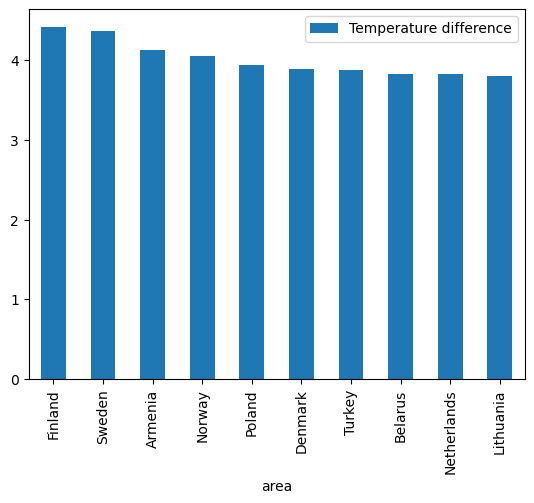

In [77]:
temp_diff_europe.sort_values(by='Temperature difference', ascending=False, inplace=True)
temp_diff_europe.head(10).plot(kind='bar', y='Temperature difference')
plt.show()

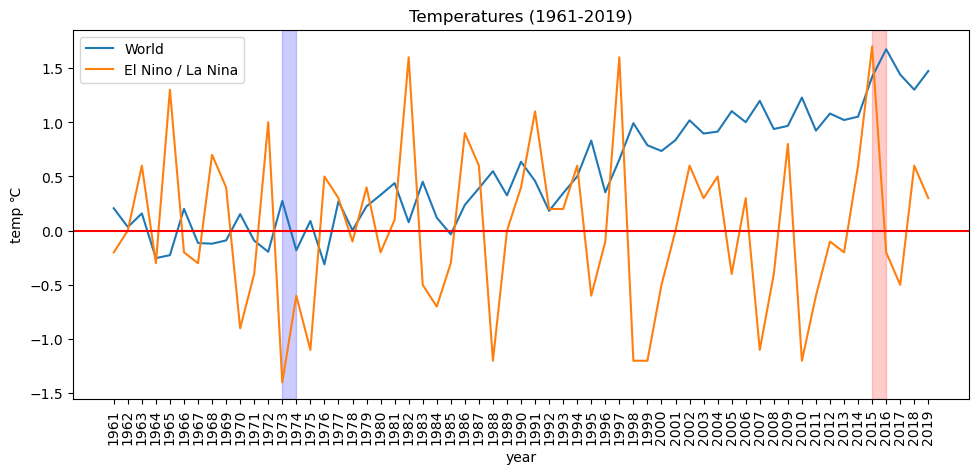

In [78]:
x = world_t_ok.columns
y1 = world_t_ok.values.T

el_la_row = el_la_plot.iloc[0] # get first row
el_la_array = el_la_row.to_numpy() # convert row to numpy array
y2 = el_la_array.T

plt.plot(x, y1, label='World')

plt.plot(x, y2, label='El Nino / La Nina')
plt.axhline(y=0.0, color='r', linestyle='-')

ymax = np.max(y2)
ymin = np.min(y2)

for i in range(len(y2)):
    if y2[i] == ymax:
        plt.axvspan(x[i], x[i+1], alpha=0.2, color='red')
    elif y2[i] == ymin:
        plt.axvspan(x[i], x[i+1], alpha=0.2, color='blue')

# plt.fill_between(x, y2, where=(y2 > 0.0), interpolate=True, color='red', alpha=0.2)
# plt.fill_between(x, y2, where=(y2 < 0.0), interpolate=True, color='blue', alpha=0.2)

plt.xticks(rotation=90)
plt.subplots_adjust(left=-0.5)
plt.xlabel('year')
plt.ylabel('temp \u2103')
plt.title('Temperatures (1961-2019)')
plt.legend()
plt.show();

=====================================================================================

====================================

====================================

====================================